# Convolutional Neural Networks (CNN)
- A convolutional neural network is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks, based on their shared-weights architecture and translation invariance characteristics.
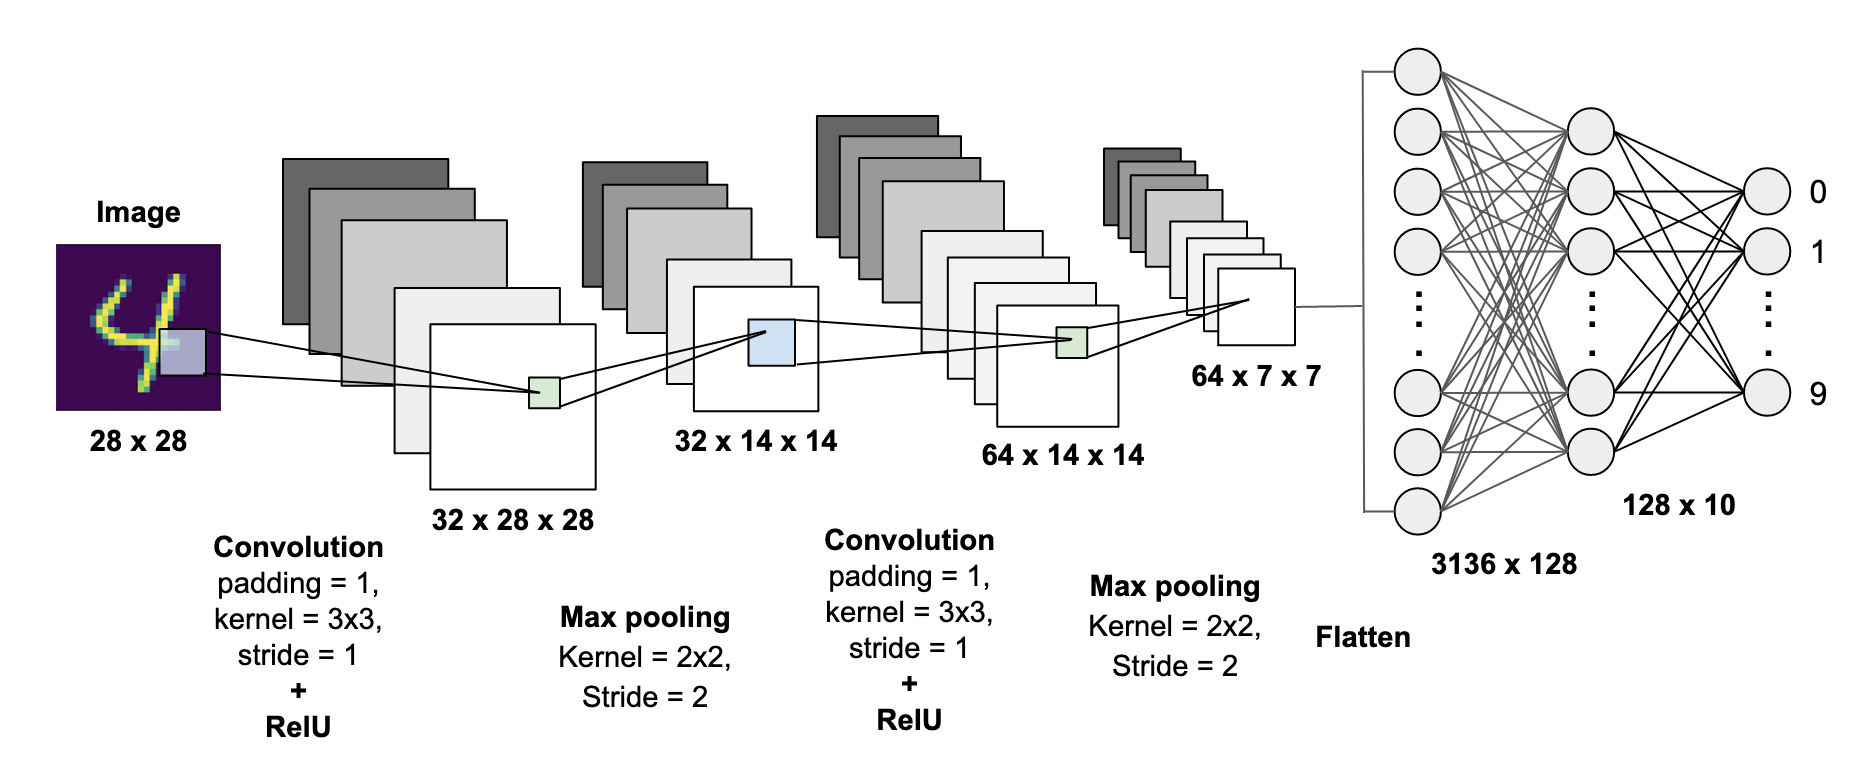
- Steps for CNN;
        - Step 1 : Convolution
        - Step 2 : Max Pooling
        - Step 3 : Flattening
        - Step 4 : Full Connection

#### Step 1 : Convolution
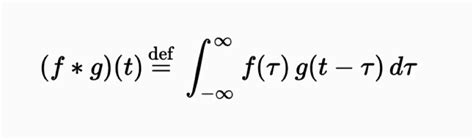
- In mathematics convolution is a mathematical operation on two functions that produces a third function expressing how the shape of one is modified by the other. The term convolution refers to both the result function and to the process of computing it.
- It is a combined integration of 2 function and it shows how one function modifies the other.

**Step 2 : Max Pooling**
- Max pooling is a type of operation that is typically added to CNNs following individual convolutional layers. When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.

**Step 3 : Flattening**
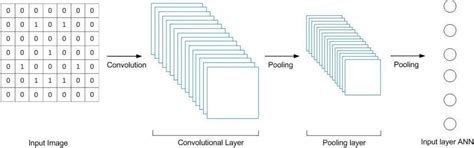

**Step 4 : Full Connection**
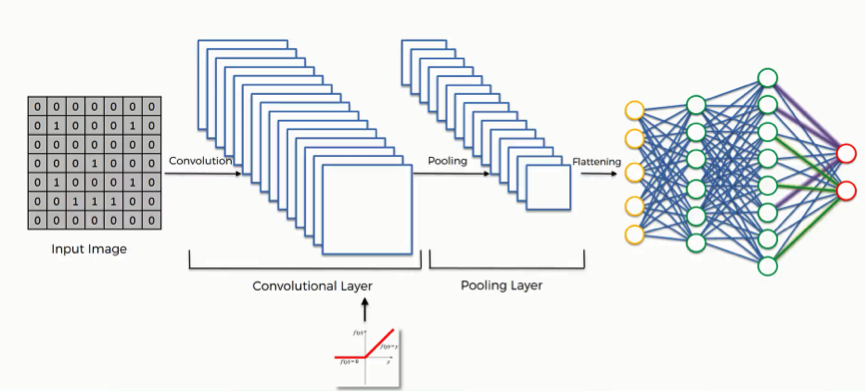

**Softmax & Cross-Entropy**
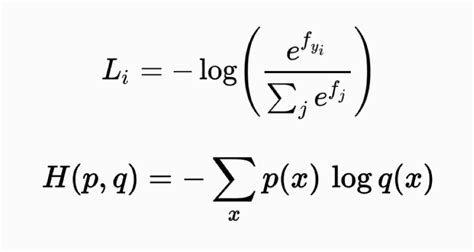

**Importing the Libraries**

In [1]:
# Importing Libraries and Packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Part - 1 : Data Preprocessing

**Preprocessing the Training Set**

In [2]:
# Transformation is needed, because to avoid over fitting
# Transformation are some geometrical transformation or some zoom or some rotation on image.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Trainging Set
training_set = train_datagen.flow_from_directory('D:\\Programming Language\\Machine Learning\\dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


**Preprocessing the Test Set**

In [3]:
# Transformation is needed, because to avoid over fitting
# Transformation are some geometrical transformation or some zoom or some rotation on image.
test_datagen = ImageDataGenerator(rescale = 1./255)

# Test Set
test_set = test_datagen.flow_from_directory('D:\\Programming Language\\Machine Learning\\dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Part - 2 : Building the CNN

**Initialising the CNN**

In [4]:
cnn = tf.keras.models.Sequential()

**Step 1 : Convolution**

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))


**Step 2 : Pooling**

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**Adding a second convolution**

In [7]:
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 : Flattening**

In [8]:
cnn.add(tf.keras.layers.Flatten())

**Step 4 : Full Connection**

In [9]:
cnn.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))

**Step 5 : Output Layer**

In [10]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### Part - 3 : Training the CNN

**Compiling the CNN**

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training Set eveluating on the Test Set**

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 312s 1s/step - loss: 0.6689 - accuracy: 0.5928 - val_loss: 0.6162 - val_accuracy: 0.6870
Epoch 2/25
250/250 [==============================] - 67s 267ms/step - loss: 0.6094 - accuracy: 0.6658 - val_loss: 0.5777 - val_accuracy: 0.7095
Epoch 3/25
250/250 [==============================] - 66s 266ms/step - loss: 0.5782 - accuracy: 0.6977 - val_loss: 0.5481 - val_accuracy: 0.7215
Epoch 4/25
250/250 [==============================] - 66s 264ms/step - loss: 0.5416 - accuracy: 0.7279 - val_loss: 0.5724 - val_accuracy: 0.7100
Epoch 5/25
250/250 [==============================] - 65s 260ms/step - loss: 0.5296 - accuracy: 0.7344 - val_loss: 0.5017 - val_accuracy: 0.7560
Epoch 6/25
250/250 [==============================] - 66s 264ms/step - loss: 0.4957 - accuracy: 0.7591 - val_loss: 0.5419 - val_accuracy: 0.7445
Epoch 7/25
250/250 [==============================] - 66s 264ms/step - loss: 0.4830 - accuracy: 0.7621 - val_loss: 0.4912 - val_accu

### Part - 4 : Making a Single Prediction

In [13]:
# Import Libraries and Packages
# Numpy allows us to work with array.
import numpy as np

from keras.preprocessing import image

test_image = image.load_img('D:/Programming Language/Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg',
                           target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Dog'
else:
    prediction = "Cat"
    
print(prediction)

Dog
